# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [21]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [23]:
%%R

# My commonly used R imports

require('tidyverse')

Below is a Python cell, there is nothing at the top of the cell because it is python by default.

Now another R cell, `%%R -i df` indicates that this is an R cell and imports the dataframe from Python. This is one way to pass data back and forth from R to Python. Another is to write a CSV file in Python and read it in R (or vice versa)

In [24]:
import pandas as pd
#always show all columns
pd.set_option('display.max_columns', 5000)

In [25]:
# read data
df = pd.read_csv('merged_data.csv')

# selected_borough = 'NYC'
selected_borough = 'MANHATTAN'
# selected_borough = 'MANHATTAN'
# selected_borough = 'QUEENS'
# selected_borough = 'STATEN ISLAND'
# selected_borough = 'BROOKLYN'

if selected_borough in ['BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BROOKLYN']:
    df = df.query('BOROUGH==@selected_borough')

df



,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Unnamed: 0,GEOID,NAME,population_estimate,number_household_below_poverty_estimate,number_of_housing_units_estimate,median_household_inc_estimate,population_moe,number_household_below_poverty_moe,number_of_housing_units_moe,median_household_inc_moe,percent_below_poverty
679,59725/17,10554,10 HANOVER SQUARE,8X,2017-06-07,Edward,Guida,Residential,MANHATTAN,10005,Not an Ejectment,Possession,40.704328,-74.009230,1,1,7,1000859.0,1.000310e+09,Battery Park City-Lower Manhattan,245,36061000700,"Census Tract 7, New York County, New York",8653,279,4808,193276.0,993,250,529,24210.0,0.058028
680,315399/22B,115404,95 WALL STREET,2316,2023-10-05,Justin,Grossman,Residential,MANHATTAN,10005,Not an Ejectment,Possession,40.704932,-74.007488,1,1,7,1000864.0,1.000330e+09,Battery Park City-Lower Manhattan,245,36061000700,"Census Tract 7, New York County, New York",8653,279,4808,193276.0,993,250,529,24210.0,0.058028
681,70061/19,12594,100 BROADWAY 9TH FLOOR,NaN,2020-02-05,Robert,Renzulli,Commercial,MANHATTAN,10005,Not an Ejectment,Possession,40.708140,-74.011373,1,1,7,1001024.0,1.000460e+09,Battery Park City-Lower Manhattan,245,36061000700,"Census Tract 7, New York County, New York",8653,279,4808,193276.0,993,250,529,24210.0,0.058028
682,50356/18,15747,95 WALL STREET,319,2018-03-28,Edward,Guida,Residential,MANHATTAN,10005,Not an Ejectment,Possession,40.704932,-74.007488,1,1,7,1000864.0,1.000330e+09,Battery Park City-Lower Manhattan,245,36061000700,"Census Tract 7, New York County, New York",8653,279,4808,193276.0,993,250,529,24210.0,0.058028
683,303733/20,107634,95 WALL STREET,1806,2022-05-13,Justin,Grossman,Residential,MANHATTAN,10005,Not an Ejectment,Possession,40.704932,-74.007488,1,1,7,1000864.0,1.000330e+09,Battery Park City-Lower Manhattan,245,36061000700,"Census Tract 7, New York County, New York",8653,279,4808,193276.0,993,250,529,24210.0,0.058028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71672,63008/19,19496,11 EAST 78TH STREET,2A,2020-01-07,George,"Essock, Jr.",Residential,MANHATTAN,10021,Not an Ejectment,Possession,40.776062,-73.963609,8,4,142,1041861.0,1.013930e+09,Upper East Side-Carnegie Hill,1635,36061014200,"Census Tract 142, New York County, New York",4747,213,2094,211951.0,877,209,336,89044.0,0.101719
71673,58990/19,11070,1116 MADISON AVENUE A/K/A 25 EAST 83RD STREET ...,NaN,2019-06-12,Robert,Renzulli,Commercial,MANHATTAN,10028,Not an Ejectment,Possession,40.779069,-73.960130,8,4,142,1046802.0,1.014958e+09,Upper East Side-Carnegie Hill,1635,36061014200,"Census Tract 142, New York County, New York",4747,213,2094,211951.0,877,209,336,89044.0,0.101719
71755,N65407/17,82210,428-430 LAFAYETTE ST REET,STORAGE SPACE LOCATE,2017-10-13,Ileana,Rivera,Commercial,MANHATTAN,10003,Not an Ejectment,Possession,40.729039,-73.992153,2,2,57,1008804.0,1.005450e+09,West Village,254,36061005700,"Census Tract 57, New York County, New York",3016,66,1506,198529.0,556,50,222,64872.0,0.043825
71756,67630/18,487926,400 W. 119TH STREET,7P,2019-02-13,Danny,Weinheim,Residential,MANHATTAN,10027,Not an Ejectment,Possession,40.808088,-73.958054,9,7,20701,1059506.0,1.019620e+09,Morningside Heights,2249,36061020701,"Census Tract 207.01, New York County, New York",2870,482,1075,67610.0,337,168,145,19576.0,0.448372


In [26]:
# what's going on in census tract 113 where there are 60+% evictions?
#df.query('NAME.str.contains("Census Tract 113")').query('BOROUGH=="MANHATTAN"')

In [27]:
%%R -i selected_borough,df

selected_borough

[1] "MANHATTAN"


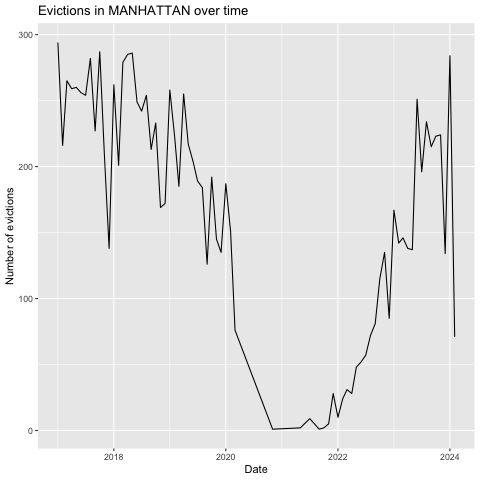

In [28]:
%%R -i df,selected_borough

# read as date column
df$`Executed Date` <- as.Date(df$`Executed Date`)

#extract year and month from the date
df$month_year = as.Date(format(df$`Executed Date`, "%Y-%m-01"))

# plot the number of evictions over time
df %>%
  group_by(month_year) %>%
  summarise(n = n()) %>%
  ggplot() +
    aes(x=month_year, y=n) + 
    geom_line() + 
    labs(
      title=paste("Evictions in",selected_borough, "over time"),
      x="Date",
      y="Number of evictions"
    )

In [29]:
# in python create a variable called df_pre (for pre-pandemic data) 
# that filters Executed Date from the data from july through december 2019
df_pre = df.query('`Executed Date` >= "2019-07-01"').query('`Executed Date` <= "2019-12-31"')

# in python create a variable called df_post (for post-pandemic data) 
# that filters Executed Date from the data from july through december 2023
df_post = df.query('`Executed Date` >= "2023-07-01"').query('`Executed Date` <= "2023-12-31"')

In [30]:
# PIVOT TABLE TO GET FROM ONE ROW PER EVICTION TO ONE ROW PER CENSUS TRACT

#in python group df by the following columns: GEOID	NAME	population_estimate	number_household_below_poverty_estimate	number_of_housing_units_estimate	median_household_inc_estimate	population_moe	number_household_below_poverty_moe	number_of_housing_units_moe	median_household_inc_moe	percent_below_poverty
tracts_pre = df_pre.groupby(['GEOID', 'NAME', 'BOROUGH', 'population_estimate', 'number_household_below_poverty_estimate', 'number_of_housing_units_estimate', 'median_household_inc_estimate', 
                 'population_moe', 'number_household_below_poverty_moe', 'number_of_housing_units_moe', 
                 'median_household_inc_moe']).agg({'Court Index Number': 'count'})\
                    .reset_index()\
                    .rename(columns={'Court Index Number': 'evictions'})
tracts_pre['eviction_rate'] = tracts_pre['evictions'] / tracts_pre['population_estimate'] * 100
tracts_pre['poverty_rate'] = tracts_pre['number_household_below_poverty_estimate'] / tracts_pre['population_estimate'] * 100
tracts_pre['pre_or_post'] = 'july-dec-2019'
tracts_pre.sort_values(by='eviction_rate', ascending=False)



,GEOID,NAME,BOROUGH,population_estimate,number_household_below_poverty_estimate,number_of_housing_units_estimate,median_household_inc_estimate,population_moe,number_household_below_poverty_moe,number_of_housing_units_moe,median_household_inc_moe,evictions,eviction_rate,poverty_rate,pre_or_post
75,36061011300,"Census Tract 113, New York County, New York",MANHATTAN,107,5,44,81667.0,37,8,18,8561.0,3,2.803738,4.672897,july-dec-2019
61,36061009600,"Census Tract 96, New York County, New York",MANHATTAN,220,5,170,98846.0,80,7,61,97208.0,5,2.272727,2.272727,july-dec-2019
69,36061010900,"Census Tract 109, New York County, New York",MANHATTAN,251,5,107,155417.0,58,7,24,47068.0,4,1.593625,1.992032,july-dec-2019
65,36061010200,"Census Tract 102, New York County, New York",MANHATTAN,214,23,156,83857.0,132,25,121,34506.0,2,0.934579,10.747664,july-dec-2019
154,36061021400,"Census Tract 214, New York County, New York",MANHATTAN,3034,500,2023,54375.0,370,232,236,14492.0,17,0.560316,16.479895,july-dec-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,36061004400,"Census Tract 44, New York County, New York",MANHATTAN,16629,2187,8177,125895.0,1907,929,837,27330.0,2,0.012027,13.151723,july-dec-2019
108,36061015900,"Census Tract 159, New York County, New York",MANHATTAN,8606,556,5024,144315.0,1511,293,658,30528.0,1,0.011620,6.460609,july-dec-2019
136,36061019100,"Census Tract 191, New York County, New York",MANHATTAN,8888,536,4460,130625.0,1068,316,497,20299.0,1,0.011251,6.030603,july-dec-2019
83,36061012400,"Census Tract 124, New York County, New York",MANHATTAN,10249,352,4931,134163.0,1304,233,606,26603.0,1,0.009757,3.434481,july-dec-2019


In [31]:
# PIVOT TABLE TO GET FROM ONE ROW PER EVICTION TO ONE ROW PER CENSUS TRACT

#in python group df by the following columns: GEOID	NAME	population_estimate	number_household_below_poverty_estimate	number_of_housing_units_estimate	median_household_inc_estimate	population_moe	number_household_below_poverty_moe	number_of_housing_units_moe	median_household_inc_moe	percent_below_poverty
tracts_post = df_post.groupby(['GEOID', 'NAME', 'BOROUGH', 'population_estimate', 'number_household_below_poverty_estimate', 'number_of_housing_units_estimate', 'median_household_inc_estimate', 
                 'population_moe', 'number_household_below_poverty_moe', 'number_of_housing_units_moe', 
                 'median_household_inc_moe']).agg({'Court Index Number': 'count'})\
                    .reset_index()\
                    .rename(columns={'Court Index Number': 'evictions'})
tracts_post['eviction_rate'] = tracts_post['evictions'] / tracts_post['population_estimate'] * 100
tracts_post['poverty_rate'] = tracts_post['number_household_below_poverty_estimate'] / tracts_post['population_estimate'] * 100
tracts_post['pre_or_post'] = 'jul-dec-2023'
tracts_post.sort_values(by='eviction_rate', ascending=False)

,GEOID,NAME,BOROUGH,population_estimate,number_household_below_poverty_estimate,number_of_housing_units_estimate,median_household_inc_estimate,population_moe,number_household_below_poverty_moe,number_of_housing_units_moe,median_household_inc_moe,evictions,eviction_rate,poverty_rate,pre_or_post
82,36061011300,"Census Tract 113, New York County, New York",MANHATTAN,107,5,44,81667.0,37,8,18,8561.0,2,1.869159,4.672897,jul-dec-2023
68,36061009600,"Census Tract 96, New York County, New York",MANHATTAN,220,5,170,98846.0,80,7,61,97208.0,4,1.818182,2.272727,jul-dec-2023
77,36061010900,"Census Tract 109, New York County, New York",MANHATTAN,251,5,107,155417.0,58,7,24,47068.0,3,1.195219,1.992032,jul-dec-2023
180,36061023502,"Census Tract 235.02, New York County, New York",MANHATTAN,1716,380,761,49750.0,328,182,87,24901.0,13,0.757576,22.144522,jul-dec-2023
137,36061018800,"Census Tract 188, New York County, New York",MANHATTAN,4955,1421,2239,42272.0,1063,641,331,13234.0,25,0.504541,28.678103,jul-dec-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,36061010601,"Census Tract 106.01, New York County, New York",MANHATTAN,7632,262,4293,243082.0,1431,168,601,54350.0,1,0.013103,3.432914,jul-dec-2023
47,36061007200,"Census Tract 72, New York County, New York",MANHATTAN,7882,281,4392,141161.0,894,177,523,28189.0,1,0.012687,3.565085,jul-dec-2023
61,36061008800,"Census Tract 88, New York County, New York",MANHATTAN,8108,385,4896,119571.0,975,189,529,26399.0,1,0.012333,4.748397,jul-dec-2023
121,36061017100,"Census Tract 171, New York County, New York",MANHATTAN,9517,1067,4173,148201.0,1669,556,801,37251.0,1,0.010508,11.211516,jul-dec-2023


In [32]:
tracts = pd.concat([tracts_pre, tracts_post])
tracts.sort_values(by='poverty_rate', ascending=False)

,GEOID,NAME,BOROUGH,population_estimate,number_household_below_poverty_estimate,number_of_housing_units_estimate,median_household_inc_estimate,population_moe,number_household_below_poverty_moe,number_of_housing_units_moe,median_household_inc_moe,evictions,eviction_rate,poverty_rate,pre_or_post
15,36061002400,"Census Tract 24, New York County, New York",MANHATTAN,4385,2627,1780,14533.0,759,705,157,4549.0,4,0.091220,59.908780,july-dec-2019
0,36061000201,"Census Tract 2.01, New York County, New York",MANHATTAN,2740,1461,856,32286.0,1385,1360,184,18432.0,1,0.036496,53.321168,jul-dec-2023
16,36061002500,"Census Tract 25, New York County, New York",MANHATTAN,5289,2534,1979,21381.0,907,862,159,3557.0,5,0.094536,47.910758,july-dec-2019
88,36061011900,"Census Tract 119, New York County, New York",MANHATTAN,1152,540,1048,18056.0,160,132,159,4457.0,2,0.173611,46.875000,jul-dec-2023
81,36061011900,"Census Tract 119, New York County, New York",MANHATTAN,1152,540,1048,18056.0,160,132,159,4457.0,2,0.173611,46.875000,july-dec-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,36061014401,"Census Tract 144.01, New York County, New York",MANHATTAN,4644,100,2445,166583.0,804,82,444,49167.0,1,0.021533,2.153316,jul-dec-2023
76,36061010602,"Census Tract 106.02, New York County, New York",MANHATTAN,4812,97,2105,194188.0,555,87,211,45533.0,1,0.020781,2.015794,jul-dec-2023
69,36061010900,"Census Tract 109, New York County, New York",MANHATTAN,251,5,107,155417.0,58,7,24,47068.0,4,1.593625,1.992032,july-dec-2019
77,36061010900,"Census Tract 109, New York County, New York",MANHATTAN,251,5,107,155417.0,58,7,24,47068.0,3,1.195219,1.992032,jul-dec-2023


## T-Tests

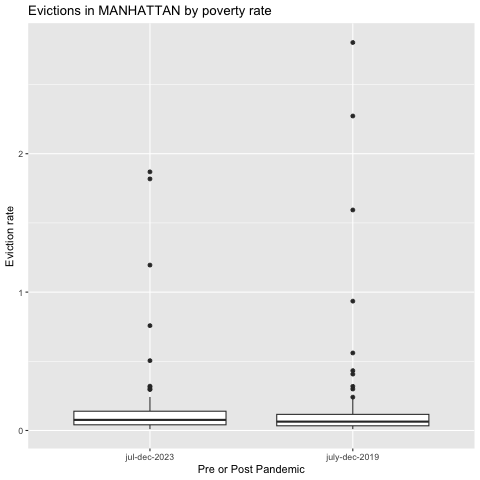

In [33]:
%%R -i tracts,selected_borough
# Plot boxplot X=pre_or_post, Y=eviction_rate
tracts %>%
  ggplot() +
    aes(x=pre_or_post, y=eviction_rate) + 
    geom_boxplot() + 
    labs(
      title=paste("Evictions in",selected_borough, "by poverty rate"),
      x="Pre or Post Pandemic",
      y="Eviction rate"
    )


In [34]:
%%R
# run a t test to see if the means are different
t.test(tracts$eviction_rate ~ tracts$pre_or_post)


	Welch Two Sample t-test

data:  tracts$eviction_rate by tracts$pre_or_post
t = 0.13346, df = 387.44, p-value = 0.8939
alternative hypothesis: true difference in means between group jul-dec-2023 and group july-dec-2019 is not equal to 0
95 percent confidence interval:
 -0.04270316  0.04892289
sample estimates:
 mean in group jul-dec-2023 mean in group july-dec-2019 
                  0.1190825                   0.1159727 



## Chi-SQ Tests

In [35]:
# CHI - SQ TESTS HELP YOU CHECK IF TWO BUCKETS ARE DIFFERENT OR NOT
# BUT, BOTH VARIABLES HAVE TO BE DISCRETE

# X = pre_or_post
# Y = ???????



In [36]:
# run chi sq test


## Linear Regressions (single variable)

`geom_smooth()` using formula = 'y ~ x'


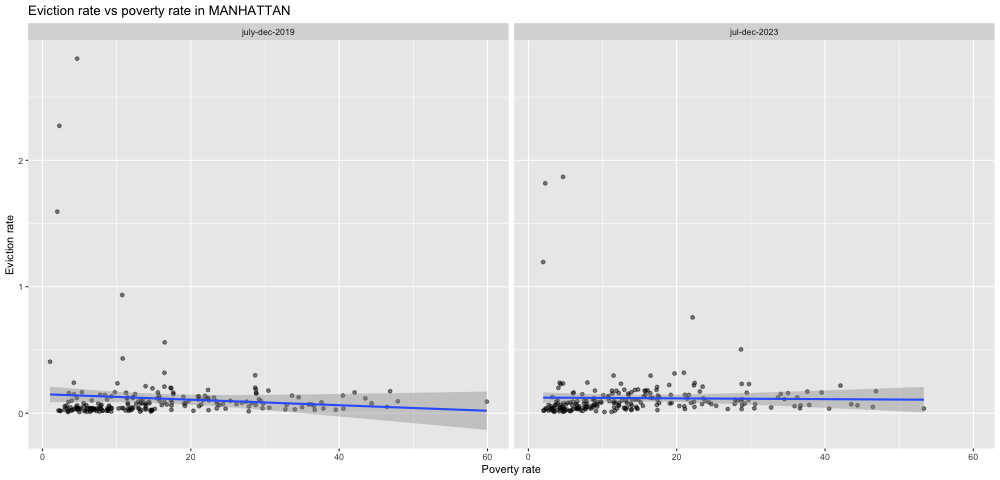

In [37]:
%%R -i tracts,selected_borough -w 1000

# require('ggrepel')

tracts$pre_or_post = factor(tracts$pre_or_post, levels=c('july-dec-2019', 'jul-dec-2023'))

# Plotting using R
plt <- ggplot(tracts) +
    aes(y=eviction_rate, x=poverty_rate) +
    geom_point(alpha=.5) +
    geom_smooth(method='lm') +
    facet_wrap(~pre_or_post) + 
    labs(
      title=paste("Eviction rate vs poverty rate in",selected_borough),
      x="Poverty rate",
      y="Eviction rate"
    )

plt

In [38]:
%%R -i tracts_pre

# Linear regression (Y~X)
model = lm(eviction_rate ~ poverty_rate, data=tracts_pre)
summary(model)


Call:
lm(formula = eviction_rate ~ poverty_rate, data = tracts_pre)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13314 -0.09643 -0.04478  0.00532  2.66355 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.150413   0.032643   4.608 7.04e-06 ***
poverty_rate -0.002187   0.001692  -1.293    0.198    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2752 on 211 degrees of freedom
Multiple R-squared:  0.007857,	Adjusted R-squared:  0.003155 
F-statistic: 1.671 on 1 and 211 DF,  p-value: 0.1976



In [39]:
%%R -i tracts_post

# Linear regression (Y~X)
model = lm(eviction_rate ~ poverty_rate, data=tracts_post)
summary(model)


Call:
lm(formula = eviction_rate ~ poverty_rate, data = tracts_post)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11104 -0.07636 -0.04125  0.02104  1.74689 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1237522  0.0231479   5.346 2.29e-07 ***
poverty_rate -0.0003183  0.0012731  -0.250    0.803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2014 on 215 degrees of freedom
Multiple R-squared:  0.0002907,	Adjusted R-squared:  -0.004359 
F-statistic: 0.06251 on 1 and 215 DF,  p-value: 0.8028



In [40]:

t.test(tracts, tracts_post$eviction_rate)

SyntaxError: invalid syntax (2163502547.py, line 1)